### Testing the Model

In [7]:
import warnings
warnings.filterwarnings("ignore")


In [8]:
import os

# List all files and directories in a specific folder
folder_path = r'C:\Users\LENOVO\Desktop\dataset\fruit_recognition'  # Change this to your folder path
files = os.listdir(folder_path)

print(files)  # Prints list of files and directories in the folder

['test', 'train', 'validation']


In [10]:
# !pip show Pillow

In [11]:
# !pip install --upgrade Pillow

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [13]:
cnn = tf.keras.models.load_model('trained_model.keras')

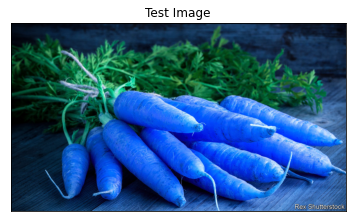

In [14]:
import cv2
image_path = r'C:\Users\LENOVO\Desktop\dataset\fruit_recognition\test\carrot\Image_1.jpg'
img = cv2.imread(image_path)
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

In [15]:
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(64,64))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


In [16]:
print(predictions)
print(max(predictions[0]))

[[4.2376965e-07 4.6553354e-13 5.0774633e-09 8.9026253e-06 1.3815050e-14
  3.6189465e-09 9.9824995e-01 1.2624558e-14 1.6253823e-09 6.8879062e-11
  2.8441121e-12 2.1330574e-15 3.2226717e-12 3.0355906e-08 9.7217486e-12
  1.1337069e-07 1.7045211e-12 9.6452414e-13 1.0109172e-11 8.0000417e-10
  3.4487404e-09 3.4215371e-04 6.1245302e-09 1.9856015e-08 8.6672009e-14
  1.0510875e-07 1.5231467e-10 1.7958081e-06 1.3387397e-07 1.4337624e-10
  1.6732119e-11 1.0495042e-12 1.3949204e-03 1.3838327e-06 1.6105448e-09
  2.6482989e-09]]
0.99824995


In [17]:
test_set = tf.keras.preprocessing.image_dataset_from_directory(
    r'C:\Users\LENOVO\Desktop\dataset\fruit_recognition\test',
    labels = 'inferred',
    label_mode = 'categorical',
    class_names = None,
    color_mode = 'rgb',
    batch_size = 32,
    image_size = (64,64),
    shuffle = True,
    seed = None,
    validation_split = None,
    subset = None,
    interpolation = 'bilinear',
    follow_links = False,
    crop_to_aspect_ratio = False
)

Found 359 files belonging to 36 classes.


In [18]:
test_set.class_names

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [23]:
file = open('labels.txt','w')
for i in test_set.class_names:
    file.write(i+'\n')
file.close()

In [24]:
with open('labels.txt') as f:
    content = f.readlines()

In [25]:
content

['apple\n',
 'banana\n',
 'beetroot\n',
 'bell pepper\n',
 'cabbage\n',
 'capsicum\n',
 'carrot\n',
 'cauliflower\n',
 'chilli pepper\n',
 'corn\n',
 'cucumber\n',
 'eggplant\n',
 'garlic\n',
 'ginger\n',
 'grapes\n',
 'jalepeno\n',
 'kiwi\n',
 'lemon\n',
 'lettuce\n',
 'mango\n',
 'onion\n',
 'orange\n',
 'paprika\n',
 'pear\n',
 'peas\n',
 'pineapple\n',
 'pomegranate\n',
 'potato\n',
 'raddish\n',
 'soy beans\n',
 'spinach\n',
 'sweetcorn\n',
 'sweetpotato\n',
 'tomato\n',
 'turnip\n',
 'watermelon\n']

In [19]:
result_index = np.where(predictions[0]==max(predictions[0]))
print(result_index[0])

[6]


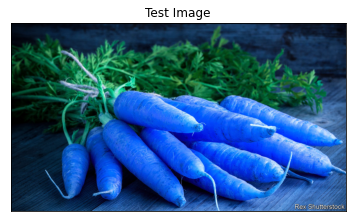

In [20]:
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

In [21]:
print("It's a {}".format(test_set.class_names[result_index[0][0]]))

It's a carrot
